In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

diabetes = pd.read_csv('/content/drive/MyDrive/files/diabetes.csv')
print(diabetes['Outcome'].value_counts())
diabetes.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
def get_eval(y_test, pred=None, pred_proba=None):
  acc = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  confusion = confusion_matrix(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print('accuracy : {0:.4f}, precision : {1:.4f}, recall : {2:.4f}, f1 : {3:.4f}, roc_auc : {4:.4f}'.format(acc, precision, recall, f1, roc_auc))

In [ ]:
def precision_recall_curve_plot(y_test=None, pred_proba_class=None):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class)
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlabel('Threshold value');plt.ylabel('Precision and Recall Curve')
  plt.legend()
  plt.show()

In [ ]:
# 실행결과 재현율(recall)이 현저히 낮음
# 재현율을 조금 올려줄 예정
# 어떻게 하면 좋을까
data = diabetes.iloc[:,:-1]
target = diabetes.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 156)

lor = LogisticRegression()
lor.fit(X_train, y_train)
pred = lor.predict(X_test)
pred_proba = lor.predict_proba(X_test)[:,1]
get_eval(y_test, pred, pred_proba)

오차행렬
[[84 13]
 [24 33]]
accuracy : 0.7597, precision : 0.7174, recall : 0.5789, f1 : 0.6408, roc_auc : 0.8408


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


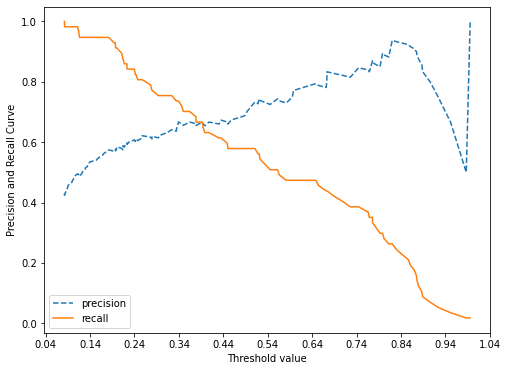

In [ ]:
# pred_proba_class = lor.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

In [ ]:
# 4분할 데이터를 보며 값이 0인 부분 찾기
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

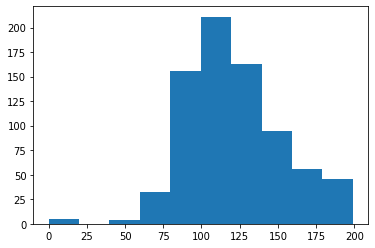

In [ ]:
plt.hist(diabetes['Glucose'], bins = 10)

In [ ]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes['Glucose'].count()

for feature in zero_features:
  zero_count = diabetes[diabetes[feature]==0][feature].count()
  print(feature, zero_count, np.round(100*zero_count/total_count, 3))

Glucose 5 0.651
BloodPressure 35 4.557
SkinThickness 227 29.557
Insulin 374 48.698
BMI 11 1.432


In [ ]:
diabetes[zero_features] =  diabetes[zero_features].replace(0, diabetes[zero_features].mean())
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
new_data = diabetes.iloc[:,:-1]
new_target = diabetes.iloc[:,-1]

scaler = StandardScaler()
data_scaler = scaler.fit_transform(new_data)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(data_scaler, new_target, test_size=0.2)

lor = LogisticRegression()
lor.fit(X_new_train, y_new_train)
new_pred = lor.predict(X_new_test)
new_pred_proba = lor.predict_proba(X_new_test)[:, 1]
get_eval(y_new_test, new_pred, new_pred_proba)

오차행렬
[[84 13]
 [24 33]]
accuracy : 0.7597, precision : 0.7174, recall : 0.5789, f1 : 0.6408, roc_auc : 0.8408

오차행렬
[[87 19]
 [21 27]]
accuracy : 0.7403, precision : 0.5870, recall : 0.5625, f1 : 0.5745, roc_auc : 0.7826


In [ ]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값 : ', custom_threshold)
    get_eval(y_test, custom_predict, pred_proba_c1)

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lor.predict_proba(X_new_test)
get_eval_by_threshold(y_new_test, pred_proba[:,1].reshape(-1,1), thresholds)  

임계값 :  0.3
오차행렬
[[70 36]
 [ 8 40]]
accuracy : 0.7143, precision : 0.5263, recall : 0.8333, f1 : 0.6452, roc_auc : 0.7826
임계값 :  0.33
오차행렬
[[73 33]
 [10 38]]
accuracy : 0.7208, precision : 0.5352, recall : 0.7917, f1 : 0.6387, roc_auc : 0.7826
임계값 :  0.36
오차행렬
[[77 29]
 [14 34]]
accuracy : 0.7208, precision : 0.5397, recall : 0.7083, f1 : 0.6126, roc_auc : 0.7826
임계값 :  0.39
오차행렬
[[79 27]
 [17 31]]
accuracy : 0.7143, precision : 0.5345, recall : 0.6458, f1 : 0.5849, roc_auc : 0.7826
임계값 :  0.42
오차행렬
[[83 23]
 [18 30]]
accuracy : 0.7338, precision : 0.5660, recall : 0.6250, f1 : 0.5941, roc_auc : 0.7826
임계값 :  0.45
오차행렬
[[85 21]
 [20 28]]
accuracy : 0.7338, precision : 0.5714, recall : 0.5833, f1 : 0.5773, roc_auc : 0.7826
임계값 :  0.48
오차행렬
[[86 20]
 [20 28]]
accuracy : 0.7403, precision : 0.5833, recall : 0.5833, f1 : 0.5833, roc_auc : 0.7826
임계값 :  0.5
오차행렬
[[87 19]
 [21 27]]
accuracy : 0.7403, precision : 0.5870, recall : 0.5625, f1 : 0.5745, roc_auc : 0.7826


In [ ]:
binarizer = Binarizer(threshold = 0.48)

pred_threshold_48 =  binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_eval(y_new_test, pred_threshold_48, pred_proba[:,1])

오차행렬
[[86 20]
 [20 28]]
accuracy : 0.7403, precision : 0.5833, recall : 0.5833, f1 : 0.5833, roc_auc : 0.7826
